In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
import matplotlib.pylab as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import missingno as msno
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]

plt.rc('font', family='AppleGothic') # For Windows
print(plt.rcParams['font.family'])


['AppleGothic']


# 확률론적 언어 모형 (Probabilistic Language Model)

In [ ]:
단어 (w1, w2, ..wn) 을 나열했을때, 실제 사용되는 문장으로 성립될 확률을 계산하는 모형. 
P(w1, w2,.. wm)


In [ ]:
사용되는 분야 
1. Spell Correction 
2. Speech Recognition 
3. Machine Translation 
4. Summarization
5. Question-Answering(Chatbot)
6. 작문 (writing)

In [ ]:
# NTLK 패키지의 바이그램 모형 : 앞뒤 두 단어의 확률로 문장을 이룰 수 있는가를 예측하는 모델 


In [1]:
# NTLK 활용하여 바이그램 모델 만들기
# 1. 말뭉치 바이그램 토큰화 
from nltk.corpus import movie_reviews
from nltk.util import ngrams

In [4]:
sentences = []   #moview review corpus 에서 문장을 뽑아내기 
for tokens in movie_reviews.sents():   #sents= 문장단위로 끝냈다. 
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]
    
#SS = sentence start라는 스페셜 토큰. 문장 앞에 삽입
#SE = sentenvce end라는 스페셜 토큰. 문장 뒤에 기입

In [5]:
sentences[:17]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE')]

In [6]:
# 2. ConditionalFreqDist 클래스 객체 생성

from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

In [7]:
cfd["SS"].most_common(5)  #문장을 시작하고 나서 바로 처음으로 나타나는 단어는.. The

[('the', 8071), ('.', 3173), ('it', 3136), ('i', 2471), ('but', 1814)]

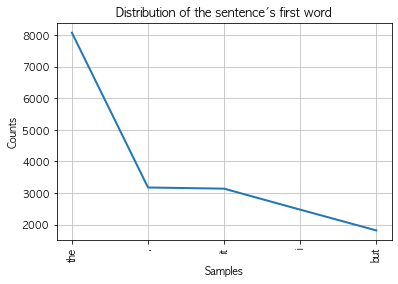

In [12]:
cfd["SS"].plot(5, title="Distribution of the sentence's first word")
plt.show()

In [14]:
#  i 다음에 올 수 있는 단어들 
cfd["i"].most_common(5)

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

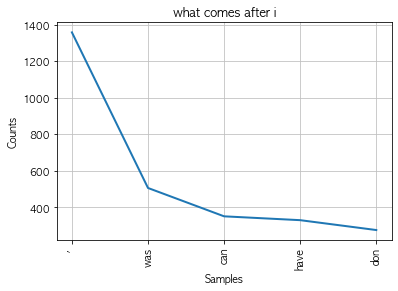

NameError: name 'plot' is not defined

In [16]:
cfd["i"].plot(5, title="what comes after i")
plot.show()

In [17]:
#  . 마핌표 다음에 올수 있는 단어들
cfd["."].most_common(5)

[('SE', 63404), ('"', 1854), (')', 535), ("'", 70), (']', 10)]

In [21]:
# 3. 조건부 확률 추정
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)  #Maximum Likelihood Estimation

In [23]:
cpd["i"].prob("am") #i 다음에 am 이 올 확률 = 1.8%. i는 regularization 이 되었다.

0.018562267971650354

In [25]:
cpd["i"].prob("was")

0.05692428844639442

In [27]:
cpd["i"].prob("is")

0.0002249971875351558

In [28]:
cpd["we"].prob("are")

0.08504504504504505

In [29]:
cpd["we"].prob("is")  #조건부 확률. we 가 나오면 is 가 나올 확률. 

0.0

In [44]:
# I am a a boy 가 나올 확률

def sentence_score(s):
    p = 0.0
    for i in range(len(s) - 1 ):
        c = s[i]
        w = s[i+1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)  #np.finfo(float).eps 표현할수 있는 가장 작은 실수
    return np.exp(p)

In [52]:
test_sentence = ["i", "like", "the", "movie", "."]
sentence_score(test_sentence)

2.740764134071561e-06

In [53]:
test_sentence = ["like", "i", "the", ".", "movie"]
sentence_score(test_sentence)

1.5015040140827832e-38

In [55]:
# movie 에 관련된. 
test_sentence = ["i", "like"]
sentence_score(test_sentence)

0.007087411407357632

In [58]:
# 5. 무작위 문장 생성

# 문장이 시작하면 무조건 SS. 그다음엔 i, but 등이 나올것이다. 

# SE 가 나올때까지 주사위를 돌리게끔함.

def generate_sentence(seed=None):
    if seed is not None:
        import random 
        random.seed(seed)
    c = "SS"
    sentence = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()  #generate 메소드 활용 
        
        if w =="SE":
            break
        else: 
            w2 = w
        if c == "SS":
            sentence.append(w2.title())
        else:
            sentence.append(" " + w2)
        c = w
    return "".join(sentence)

In [65]:
generate_sentence()

'The last summer should be kept at a hit the lame love must survive in a quivering during his true angel moment before her to date closing credits -- those guilty after a girl is the desk job for .'

In [113]:

# 한국어에 적용

from konlpy.corpus import kolaw
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from konlpy.tag import *
kolaw.fileids()

['constitution.txt']

In [114]:
hannanum = Hannanum()   
kkma = Kkma()
okt = Okt()


In [115]:
c = kolaw.open('constitution.txt').read()

In [116]:
hannanum.morphs(c)

['대한민국헌법',
 '유구',
 '하',
 'ㄴ',
 '역사',
 '와',
 '전통',
 '에',
 '빛',
 '나는',
 '우리',
 '대한국민',
 '은',
 '3·1운동',
 '으로',
 '건립',
 '되',
 'ㄴ',
 '대한민국임시정부',
 '의',
 '법통',
 '과',
 '불의',
 '에',
 '항거',
 '하',
 'ㄴ',
 '4·19민주이념',
 '을',
 '계승',
 '하고',
 ',',
 '조국',
 '의',
 '민주개혁',
 '과',
 '평화적',
 '통일',
 '의',
 '사명',
 '에',
 '입각',
 '하',
 '어',
 '정의·인도',
 '와',
 '동포애',
 '로써',
 '민족',
 '의',
 '단결',
 '을',
 '공고히',
 '하',
 '고',
 ',',
 '모든',
 '사회적',
 '폐습',
 '과',
 '불의',
 '를',
 '타파',
 '하',
 '며',
 ',',
 '자율',
 '과',
 '조화',
 '를',
 '바탕',
 '으로',
 '자유민주적',
 '기본질서',
 '를',
 '더욱',
 '확고히',
 '하',
 '어',
 '정치·경제·사회·문화',
 '의',
 '모든',
 '영역',
 '에',
 '있',
 '어서',
 '각인',
 '의',
 '기회',
 '를',
 '균등히',
 '하',
 '고',
 ',',
 '능력',
 '을',
 '최고도',
 '로',
 '발휘',
 '하',
 '게',
 '하',
 '며',
 ',',
 '자유',
 '와',
 '권리',
 '에',
 '따르',
 '는',
 '책',
 '이',
 'ㅁ',
 '과',
 '의무',
 '를',
 '완수',
 '하',
 '게',
 '하',
 '어',
 ',',
 '안',
 '으로는',
 '국민생활',
 '의',
 '균등',
 '하',
 'ㄴ',
 '향상',
 '을',
 '기',
 '하고',
 '밖',
 '으로는',
 '항구적',
 '이',
 'ㄴ',
 '세계평화',
 '와',
 '인류공영',
 '에',
 '이바',
 '이',
 '지',
 '하',
 

In [85]:
from nltk.corpus import movie_reviews
from nltk.util import ngrams

In [129]:
sentences = []
for tokens in hannanum.morphs(c):
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]


In [119]:
sentences[:100]

[('SS', '대'),
 ('대', '한'),
 ('한', '민'),
 ('민', '국'),
 ('국', '헌'),
 ('헌', '법'),
 ('법', 'SE'),
 ('SS', '유'),
 ('유', '구'),
 ('구', 'SE'),
 ('SS', '하'),
 ('하', 'SE'),
 ('SS', 'ㄴ'),
 ('ㄴ', 'SE'),
 ('SS', '역'),
 ('역', '사'),
 ('사', 'SE'),
 ('SS', '와'),
 ('와', 'SE'),
 ('SS', '전'),
 ('전', '통'),
 ('통', 'SE'),
 ('SS', '에'),
 ('에', 'SE'),
 ('SS', '빛'),
 ('빛', 'SE'),
 ('SS', '나'),
 ('나', '는'),
 ('는', 'SE'),
 ('SS', '우'),
 ('우', '리'),
 ('리', 'SE'),
 ('SS', '대'),
 ('대', '한'),
 ('한', '국'),
 ('국', '민'),
 ('민', 'SE'),
 ('SS', '은'),
 ('은', 'SE'),
 ('SS', '3'),
 ('3', '·'),
 ('·', '1'),
 ('1', '운'),
 ('운', '동'),
 ('동', 'SE'),
 ('SS', '으'),
 ('으', '로'),
 ('로', 'SE'),
 ('SS', '건'),
 ('건', '립'),
 ('립', 'SE'),
 ('SS', '되'),
 ('되', 'SE'),
 ('SS', 'ㄴ'),
 ('ㄴ', 'SE'),
 ('SS', '대'),
 ('대', '한'),
 ('한', '민'),
 ('민', '국'),
 ('국', '임'),
 ('임', '시'),
 ('시', '정'),
 ('정', '부'),
 ('부', 'SE'),
 ('SS', '의'),
 ('의', 'SE'),
 ('SS', '법'),
 ('법', '통'),
 ('통', 'SE'),
 ('SS', '과'),
 ('과', 'SE'),
 ('SS', '불'),
 ('불', '의'),
 ('의',

In [133]:
# 2. ConditionalFreqDist 클래스 객체 생성
from nltk import ConditionalFreqDist

cfd = ConditionalFreqDist(sentences)

In [134]:
cfd["SS"].most_common(5)

[('의', 527), ('ㄴ', 465), ('하', 448), ('에', 367), ('.', 341)]

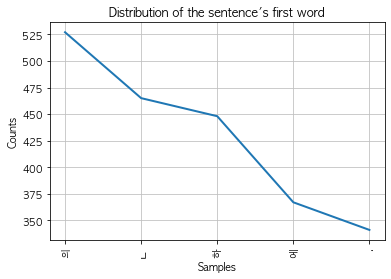

In [122]:
cfd["SS"].plot(5, title="Distribution of the sentence's first word")
plt.show()

In [123]:
#  나 다음에 올 수 있는 단어들 
cfd["대"].most_common(5)

[('통', 87), ('법', 25), ('한', 17), ('하', 10), ('SE', 10)]

In [124]:
#  . 마침표 다음에 올수 있는 단어들
cfd["."].most_common(5)

[('SE', 359), ('"', 1)]

In [136]:
# 3. 조건부 확률 추정
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist)  #Maximum Likelihood Estimation

In [137]:
cpd["대"].prob("통")

0.54375

In [139]:
cpd["대"].prob("한")

0.10625

In [140]:
def sentence_score(s):
    p = 0.0
    for i in range(len(s)-1):
        c = s[i]
        w = s[i+1]
        p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
    return np.exp(p)

In [141]:
test_sentence = ["대","한", "민", "국" ]
sentence_score(test_sentence)

0.0018220308956916201

In [144]:
def generate_sentence(seed=None):
    if seed is not None:
        import random 
        random.seed(seed)
    c = "SS"
    sentences = []
    while True:
        if c not in cpd:
            break
        w = cpd[c].generate()  #generate 메소드 활용 
        
        if w =="SE":
            break
        else: 
            w2 = w
        if c == "SS":
            sentences.append(w2.title())
        else:
            sentences.append(" " + w2)
        c = w
    return "".join(sentences)

In [169]:
generate_sentence()

'어 야'

In [183]:
# instructor 

!wget -nc -q https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt

/bin/sh: wget: command not found


In [184]:
import wget

In [185]:
import codecs
with codecs.open("ratings_train.txt", encoding='utf-8') as f : 
    data = [line.split('\t') for line in f.read().splitlines()]
    data = data[1:] # header 제외
    
docs = [row[1] for row in data]
len(docs)

4737

In [188]:
import warnings
warnings.simplefilter("ignore")
from konlpy.tag import Okt

tagger = Okt()

def tokenize(doc):
    tokens = ['/'.join(t) for t in tagger.pos(doc)]
    return tokens

tokenize("그 영화는 아주 재미있었어요")

['그/Noun', '영화/Noun', '는/Josa', '아주/Noun', '재미있었어요/Adjective']

In [190]:
from tqdm import tqdm
sentences = []

for d in tqdm(docs):
    tokens= tokenize(d)
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE" )
    sentences += [t for t in bigram]

100%|██████████| 4737/4737 [00:16<00:00, 294.92it/s]


In [191]:
cfd = ConditionalFreqDist(sentences)
cpd = ConditionalProbDist(cfd, MLEProbDist)

In [192]:
def korean_most_common(c, n, pos=None):
    if pos is None:
        return cfd[tokenize(c)[0]].most_common(n)
    else: 
        return cfd["/".join([c, pos])].most_common(n)

In [193]:
korean_most_common("나", 10)

[('는/Josa', 23),
 ('의/Josa', 12),
 ('만/Josa', 8),
 ('에게/Josa', 6),
 ('이/Determiner', 4),
 ('에겐/Josa', 4),
 ('랑/Josa', 3),
 ('혼자/Noun', 2),
 ('한테/Josa', 2),
 ('에게는/Josa', 2)]

In [194]:
korean_most_common("의", 10)

[('연기/Noun', 2),
 ('익살스런/Adjective', 1),
 ('김/Noun', 1),
 ('음악/Noun', 1),
 ('광기/Noun', 1),
 ('악몽/Noun', 1),
 ('festival/Alpha', 1),
 ('감독/Noun', 1),
 ('재능/Noun', 1),
 ('재치/Noun', 1)]

In [198]:
korean_most_common(".", 10, "Punctuation")

[('SE', 836),
 ('영화/Noun', 21),
 ('그리고/Conjunction', 18),
 ('정말/Noun', 17),
 ('하지만/Conjunction', 13),
 ('이런/Adjective', 12),
 ('그냥/Noun', 11),
 ('이/Noun', 11),
 ('./Punctuation', 11),
 ('진짜/Noun', 9)]

In [199]:
korean_most_common(".", 10)

[('SE', 836),
 ('영화/Noun', 21),
 ('그리고/Conjunction', 18),
 ('정말/Noun', 17),
 ('하지만/Conjunction', 13),
 ('이런/Adjective', 12),
 ('그냥/Noun', 11),
 ('이/Noun', 11),
 ('./Punctuation', 11),
 ('진짜/Noun', 9)]

In [200]:
def korean_bigram_prob(c, w):
    context = tokenize(c)[0]
    word = tokenize(w)[0]
    return cpd[context].prob(word)

In [201]:
korean_bigram_prob("이", "영화")

0.38022813688212925